In [3]:
#necessary libraries imported before the datapreprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
original_df = pd.read_csv("insurance.csv")
original_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#clone the dataframe
df_mod0 = original_df.copy()

In [6]:
df_mod0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df_mod0.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

○ No null values no need to take actions 

In [8]:
# Loop over the columns of the dataframe
for col in df_mod0.columns:
  # Print the column name and the number of unique values
  print(f"{col.title()} = {df_mod0[col].nunique()}")

Age = 47
Sex = 2
Bmi = 548
Children = 6
Smoker = 2
Region = 4
Charges = 1337


In [9]:
# Define a list of columns to print the unique values
cols = ['sex', 'children', 'smoker', 'region']

# Loop over the columns
for col in cols:
  # Print the column name and the unique values
  print(f"{col.title()} = {df_mod0[col].unique()}")

Sex = ['female' 'male']
Children = [0 1 3 2 5 4]
Smoker = ['yes' 'no']
Region = ['southwest' 'southeast' 'northwest' 'northeast']


In [11]:
df_mod0.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


○ Examine the distribution of Bmi (Body Mass Index)


In [14]:
print(f"{df_mod0['bmi'].astype(int).nunique()} unique integer values for bmi")

38 unique integer values for bmi


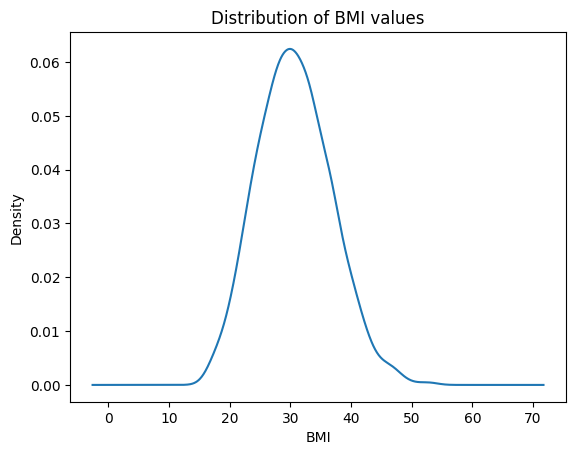

In [15]:
# Plot the distribution of bmi values using kernel density estimate
df_mod0['bmi'].plot(kind='kde')
plt.xlabel('BMI')
plt.title('Distribution of BMI values')
plt.show()


 - Produce a smooth curve that summarizes the shape of the distribution of bmi values. You can see that the distribution is roughly symmetric, with a peak around 30. You can also see that there are some outliers on both ends of the distribution.

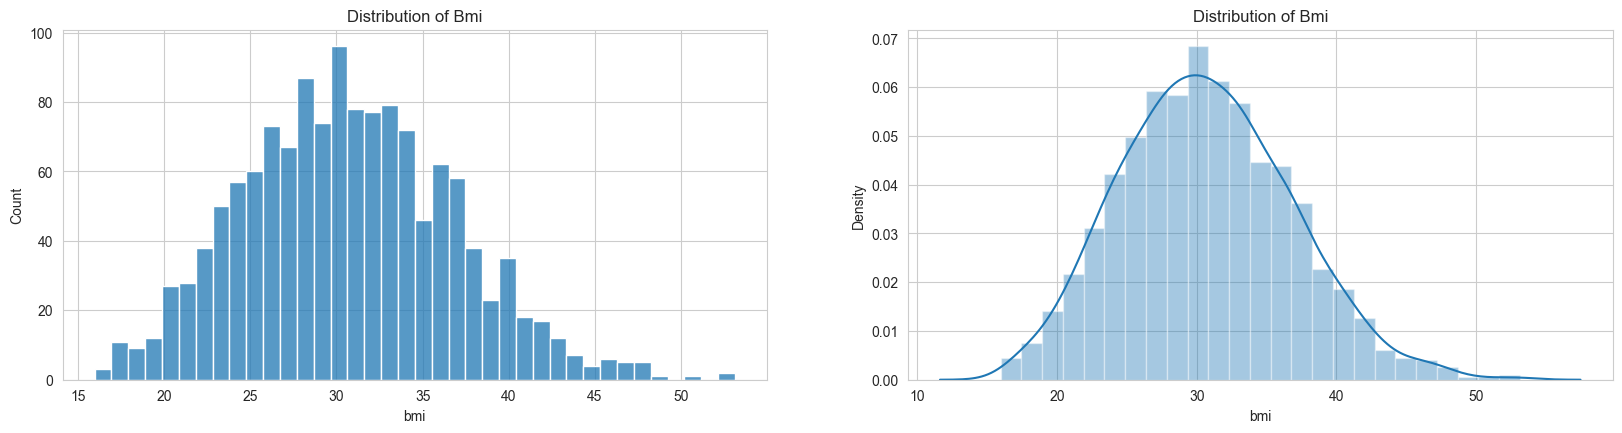

In [79]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title('Distribution of Bmi')
sns.histplot(df_mod0.bmi, kde=False, bins=38);

plt.subplot(2,2,2)
plt.title('Distribution of Bmi')
sns.distplot(df_mod0.bmi, kde=True);


In [22]:
# Group the data by gender and calculate the mean bmi for each gender
df_mod0.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

In [29]:
# Define a function to assign the Index value based on the bmi value
def bmi_index(bmi):
  if bmi < 18.5:
    return "Underweight"
  elif bmi < 25:
    return "Normal"
  elif bmi < 30:
    return "Overweight"
  elif bmi < 35:
    return "Obese"
  elif bmi < 40:
    return "Severely obese"
  else:
    return "Morbidly obese"

# Apply the function to the bmi column and create a new column called Index
df_mod1_bmi_index = df_mod0.copy()
df_mod1_bmi_index['bmi_index'] = df_mod1_bmi_index['bmi'].apply(bmi_index)

In [30]:
df_mod1_bmi_index

,age,sex,bmi,children,smoker,region,charges,bmi_index
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,Severely obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


In [84]:
# Create a pivot table that shows the mean bmi for each combination of gender and index
df_mod1_bmi_index.pivot_table(index='sex', columns="bmi_index", values='bmi', aggfunc='mean', margins=True, margins_name='All')


bmi_index,Morbidly obese,Normal,Obese,Overweight,Severely obese,Underweight,All
sex,,,,,,,
female,42.868750,22.597991,32.361604,27.604171,37.326869,17.710833,30.377749
male,43.288137,22.635787,32.318897,27.600909,37.050636,17.349375,30.943129
All,43.103791,22.616133,32.339322,27.602591,37.182000,17.566250,30.663397


In [86]:
# Create a pivot table that shows the mean bmi for each combination of gender and index
df_mod1_bmi_index.pivot_table(index='children',columns="bmi_index", values='bmi', aggfunc='mean', margins=True, margins_name='All')

bmi_index,Morbidly obese,Normal,Obese,Overweight,Severely obese,Underweight,All
children,,,,,,,
0,42.233750,22.558711,32.258006,27.529251,37.179898,17.69500,30.550296
1,44.254000,22.406875,32.372022,27.587798,37.104630,17.36500,30.623148
2,43.953333,22.891333,32.531849,27.588585,37.158778,17.38500,30.978104
3,42.778333,22.406034,32.159352,27.796625,37.367600,NaN,30.684331
4,41.350000,24.415000,33.038125,28.168750,37.667500,NaN,31.391200
5,44.575000,24.121000,32.443750,27.612000,37.000000,18.30000,29.605000
All,43.103791,22.616133,32.339322,27.602591,37.182000,17.56625,30.663397


In [87]:
# Create a pivot table that shows the mean bmi for each combination of gender and index
df_mod1_bmi_index.pivot_table(index='smoker',columns="bmi_index", values='bmi', aggfunc='mean', margins=True, margins_name='All')

bmi_index,Morbidly obese,Normal,Obese,Overweight,Severely obese,Underweight,All
smoker,,,,,,,
no,43.034857,22.582229,32.328943,27.609535,37.279486,17.521333,30.651795
yes,43.333571,22.734800,32.383784,27.573311,36.840800,17.701000,30.708449
All,43.103791,22.616133,32.339322,27.602591,37.182000,17.566250,30.663397


In [88]:
# Create a pivot table that shows the mean bmi for each combination of gender and index
df_mod1_bmi_index.pivot_table(index='region',columns="bmi_index", values='bmi', aggfunc='mean', margins=True, margins_name='All')

bmi_index,Morbidly obese,Normal,Obese,Overweight,Severely obese,Underweight,All
region,,,,,,,
northeast,41.825333,22.490274,32.230333,27.468571,37.292500,17.328000,29.173503
northwest,41.075625,22.721587,32.130810,27.503832,36.819286,17.792143,29.199785
southeast,43.652000,23.067805,32.579894,27.853375,37.278298,NaN,33.355989
southwest,43.507692,22.283333,32.428431,27.638614,37.172414,17.833333,30.596615
All,43.103791,22.616133,32.339322,27.602591,37.182000,17.566250,30.663397


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


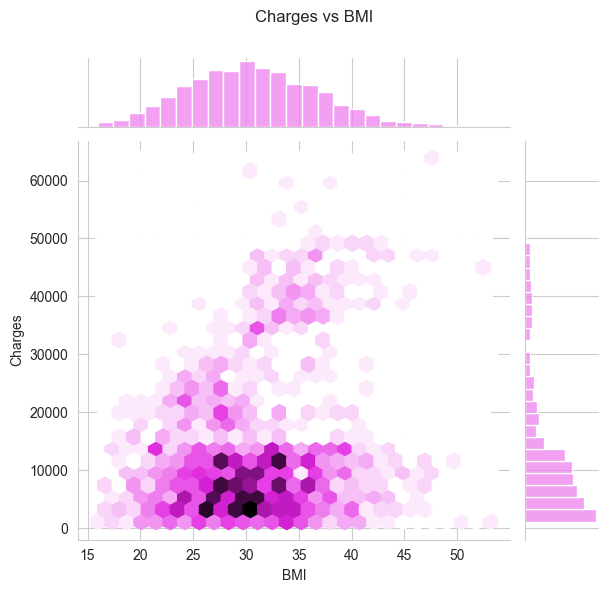

In [90]:
sns.jointplot(x = "bmi", y = "charges", data = df_mod1_bmi_index, kind ="hex",color="violet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(top=0.9)
plt.suptitle("Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

<Axes: title={'center': 'Distribution of Bmi'}, ylabel='bmi'>

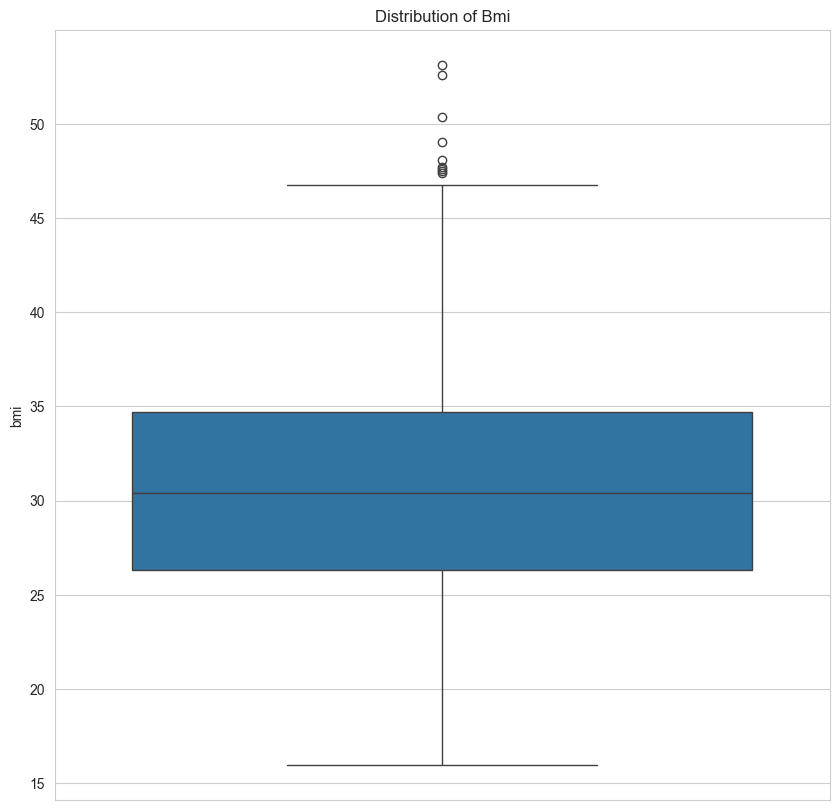

In [92]:
plt.figure(figsize=(10,10))
plt.title('Distribution of Bmi')
sns.boxplot(y="bmi", data = df_mod1_bmi_index, orient='v')

above nearly 47 bmi values seems calculated as outlier

○ Examine the relationship between “smoker” and “charges”


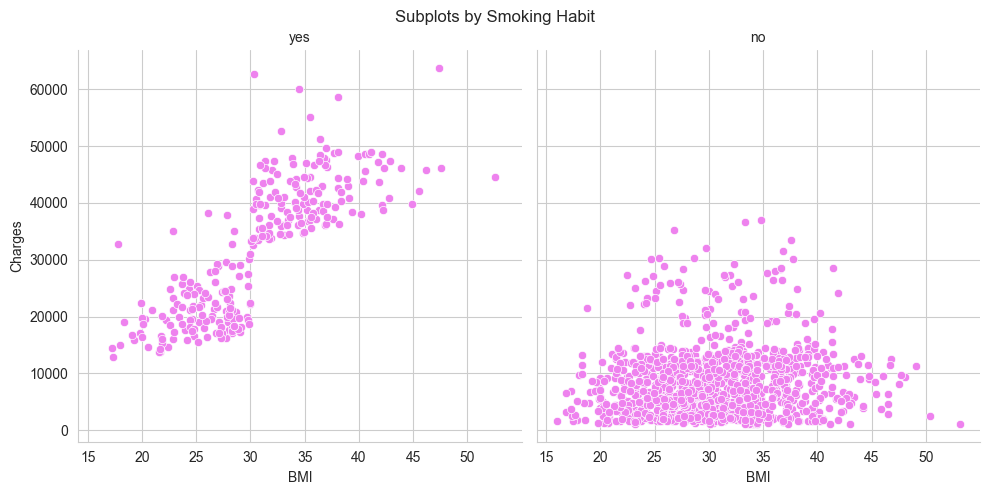

In [94]:
g = sns.FacetGrid(df_mod1_bmi_index, col="smoker", height=5, aspect=1)

g.map(sns.scatterplot, "bmi", "charges", color = "violet")

g.set_titles(col_template="{col_name}")
g.set_axis_labels("BMI", "Charges")

sns.despine()

plt.subplots_adjust(top=0.9)
plt.suptitle("Subplots by Smoking Habit")

plt.show()

Text(0.5, 1.0, 'Distrubituon of Charges for non Smokers')

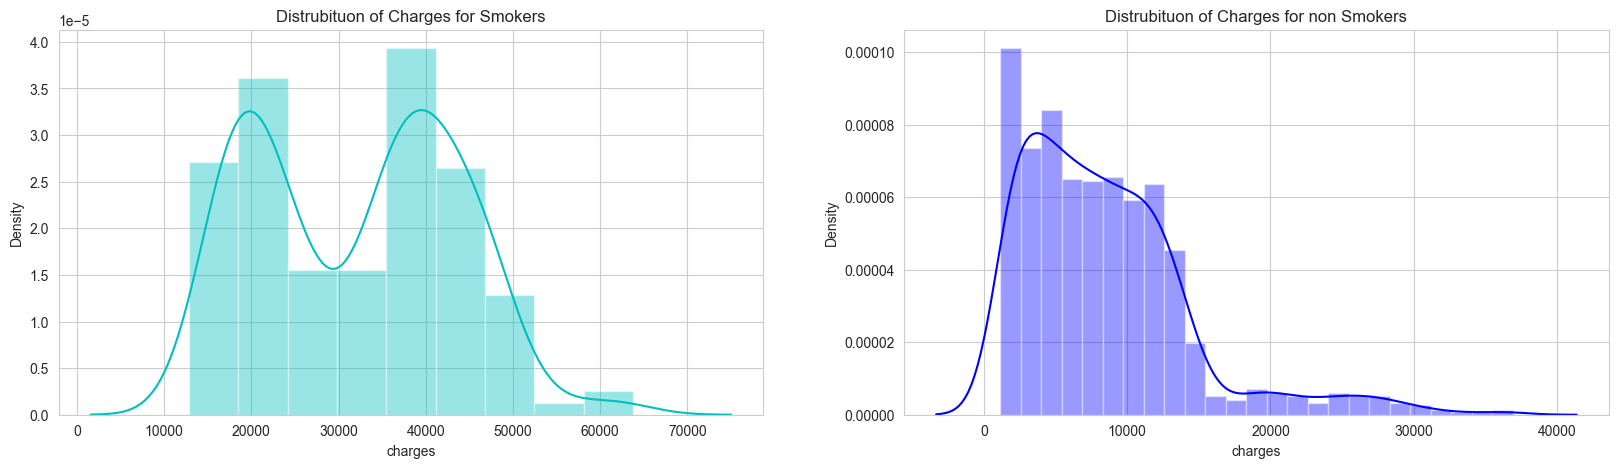

In [95]:
f = plt.figure(figsize=(20,5))

ax = f.add_subplot(121)
sns.distplot(df_mod1_bmi_index[df_mod1_bmi_index.smoker == "yes"]['charges'],color='c',ax=ax)
ax.set_title('Distrubituon of Charges for Smokers')


ax = f.add_subplot(122)
sns.distplot(df_mod1_bmi_index[df_mod1_bmi_index.smoker == "no"]['charges'],color='b',ax=ax)
ax.set_title('Distrubituon of Charges for non Smokers')

<Axes: title={'center': 'Smoker - Charges'}, xlabel='charges', ylabel='smoker'>

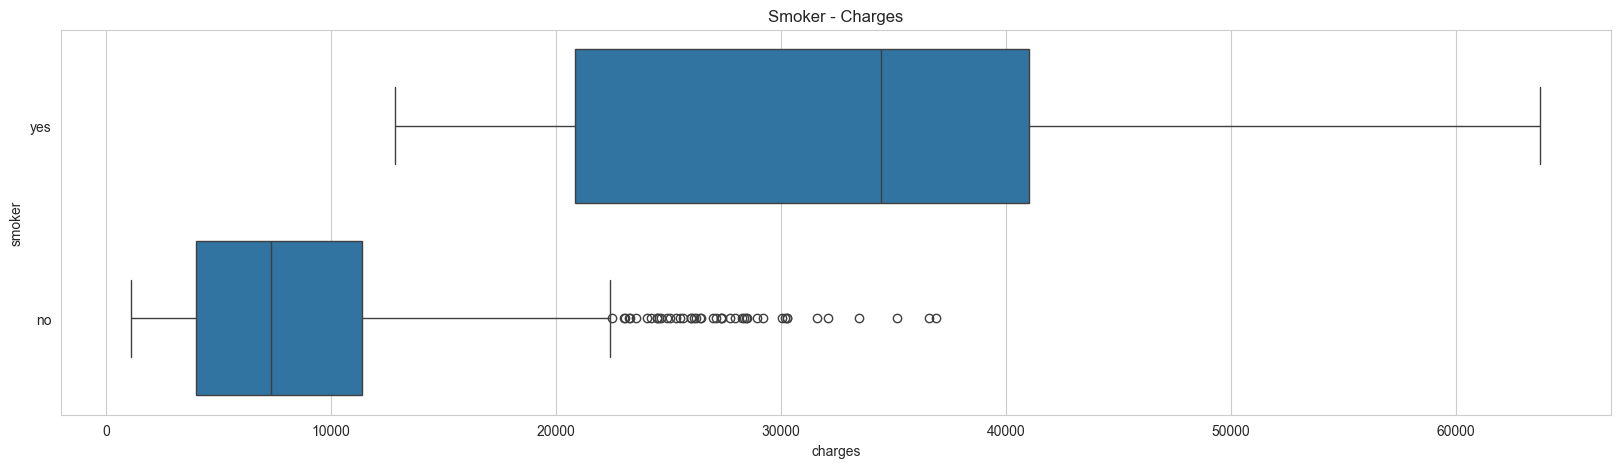

In [96]:
plt.figure(figsize=(20,5))
plt.title("Smoker - Charges")
sns.boxplot(y="smoker", x="charges", data = df_mod1_bmi_index)

In [97]:
# Calculate the number of smokers and non-smokers for each region
region_counts = df_mod1_bmi_index.groupby(['region', 'smoker']).size().unstack(fill_value=0)

# Calculate the total number of people within each region
total_counts = region_counts.sum(axis=1)

# Convert smokers and non-smokers into percentages
count_smokers = region_counts['yes']
percentage_smokers = (region_counts['yes'] / total_counts) * 100
count_non_smokers = region_counts['no']
percentage_non_smokers = (region_counts['no'] / total_counts) * 100

# Add the results to a new DataFrame
result_df = pd.DataFrame({
    'Region': percentage_smokers.index,
    'Count of Smokers': count_smokers.values,
    'Count of Non-Smokers': count_non_smokers.values,
    'Percentage of Smokers': percentage_smokers.values,
    'Percentage of Non-Smokers': percentage_non_smokers.values
})

result_df

,Region,Count of Smokers,Count of Non-Smokers,Percentage of Smokers,Percentage of Non-Smokers
0,northeast,67,257,20.679012,79.320988
1,northwest,58,267,17.846154,82.153846
2,southeast,91,273,25.000000,75.000000
3,southwest,58,267,17.846154,82.153846


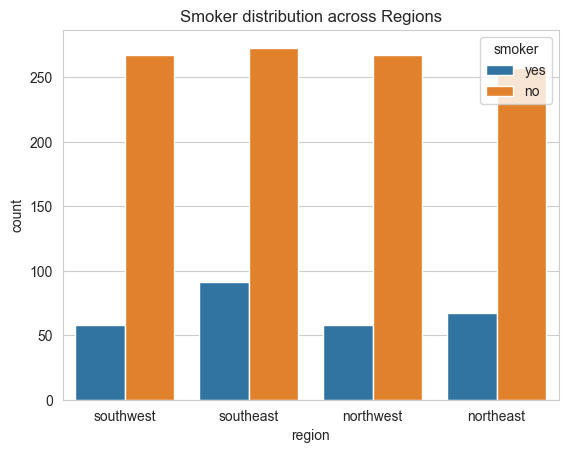

In [99]:
sns.countplot(x='region', hue='smoker', data=df_mod1_bmi_index)
plt.title('Smoker distribution across Regions')
plt.show()

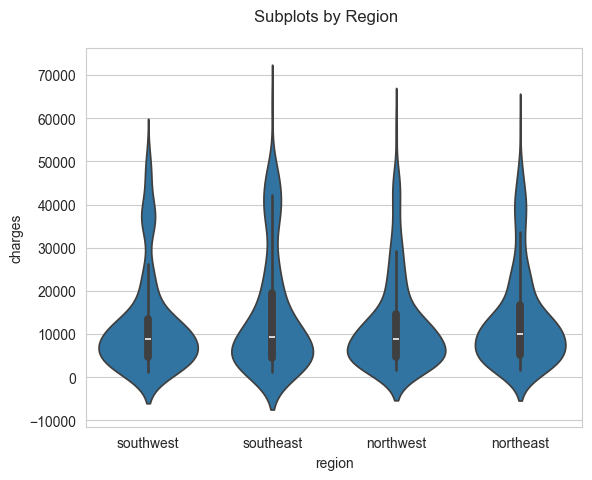

In [100]:
sns.violinplot(data = df_mod1_bmi_index, x = "region", y = "charges")
plt.subplots_adjust(top=0.9)
plt.suptitle("Subplots by Region")
plt.show()

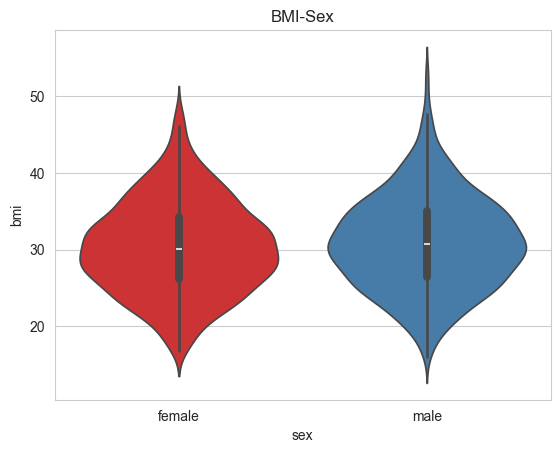

In [101]:
sns.violinplot(data=df_mod1_bmi_index, x="sex", y="bmi", palette = 'Set1')
plt.title("BMI-Sex")
plt.show()

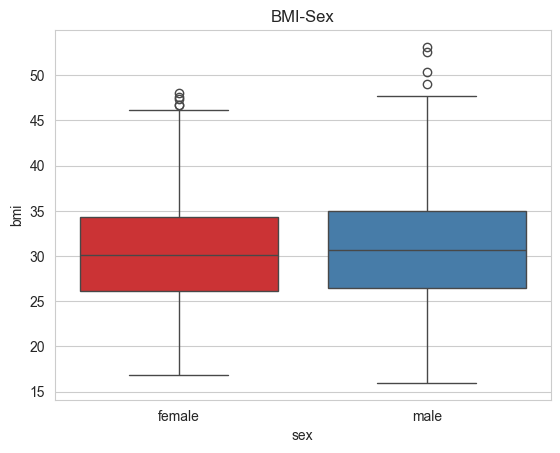

In [102]:
sns.boxplot(data=df_mod1_bmi_index, x="sex", y="bmi", palette = 'Set1')
plt.title("BMI-Sex")
plt.show()

In [103]:
region_children = df_mod1_bmi_index.groupby("region")["children"].sum()
max_children = region_children.idxmax()
max_children_count = region_children[max_children]
print("The region with the most children is ", max_children ,"with", max_children_count,"children.")

The region with the most children is  southeast with 382 children.


<Axes: title={'center': 'Smoker - Charges'}, xlabel='age', ylabel='bmi'>

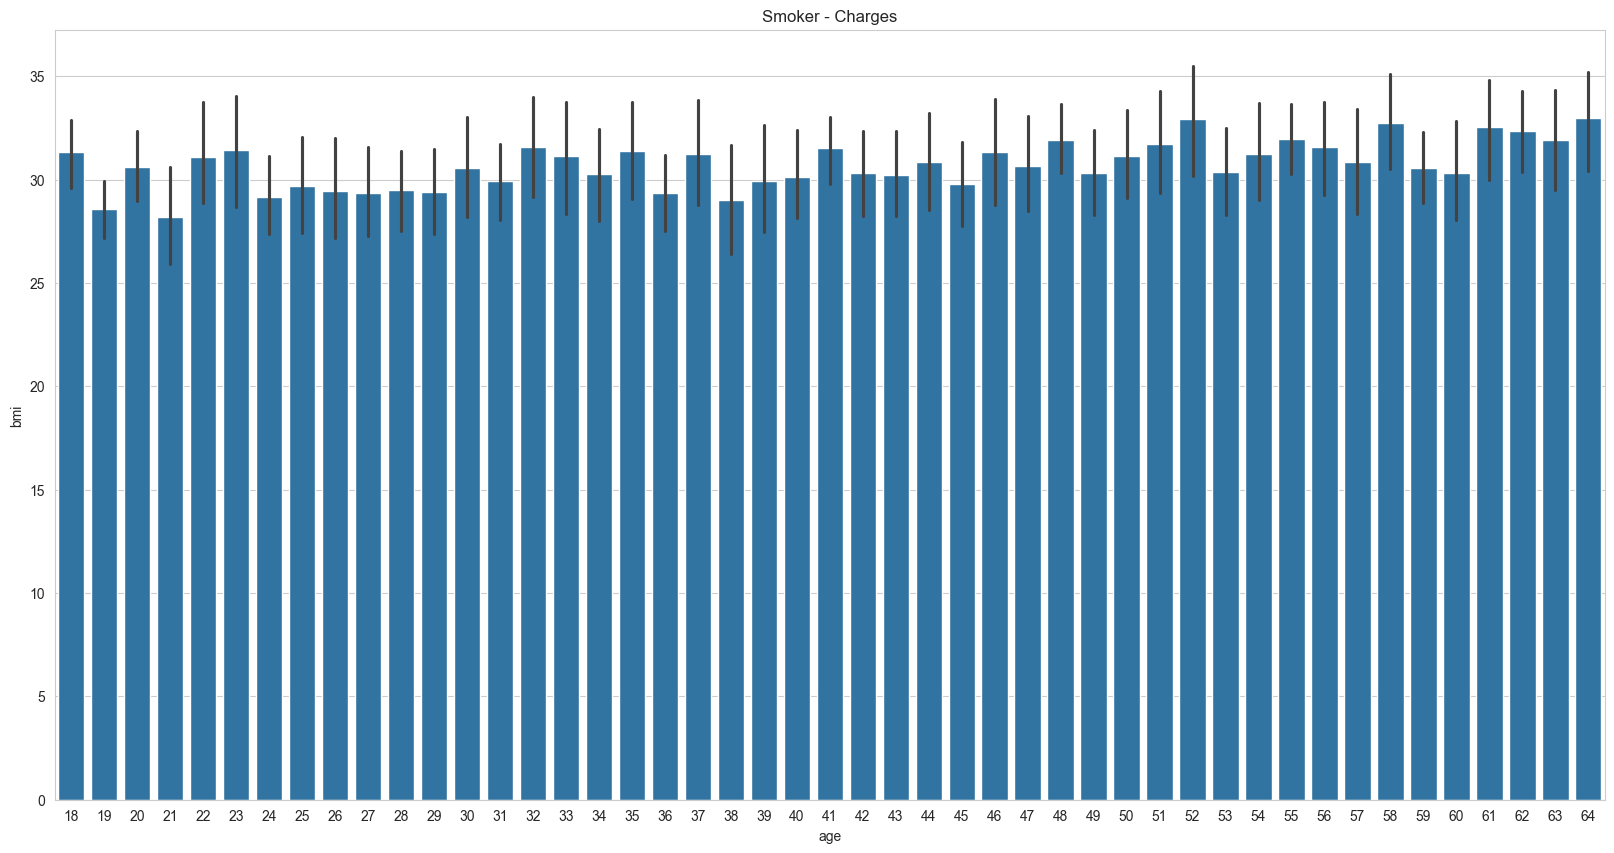

In [104]:
plt.figure(figsize=(20,10))
plt.title("Smoker - Charges")
sns.barplot(y="bmi", x="age", data = df_mod1_bmi_index)

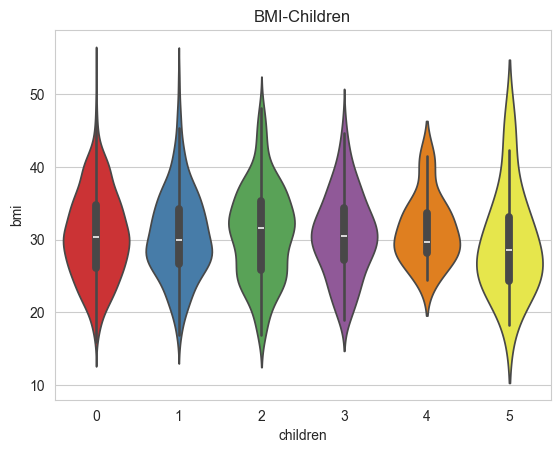

In [105]:
sns.violinplot(data=df_mod1_bmi_index, x="children", y="bmi", palette = 'Set1')
plt.title("BMI-Children")
plt.show()

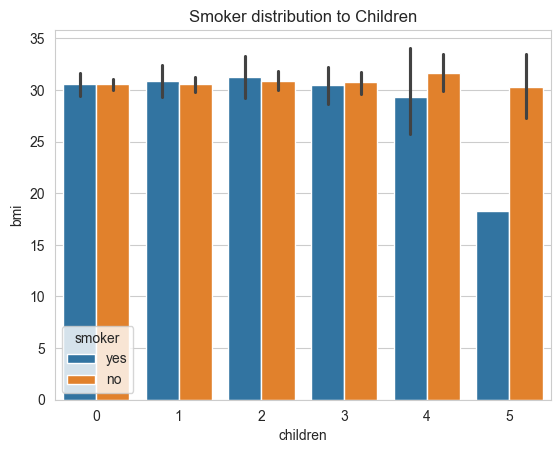

In [106]:
sns.barplot(x='children', y = 'bmi', hue='smoker', data=df_mod1_bmi_index)
plt.title('Smoker distribution to Children')
plt.show()

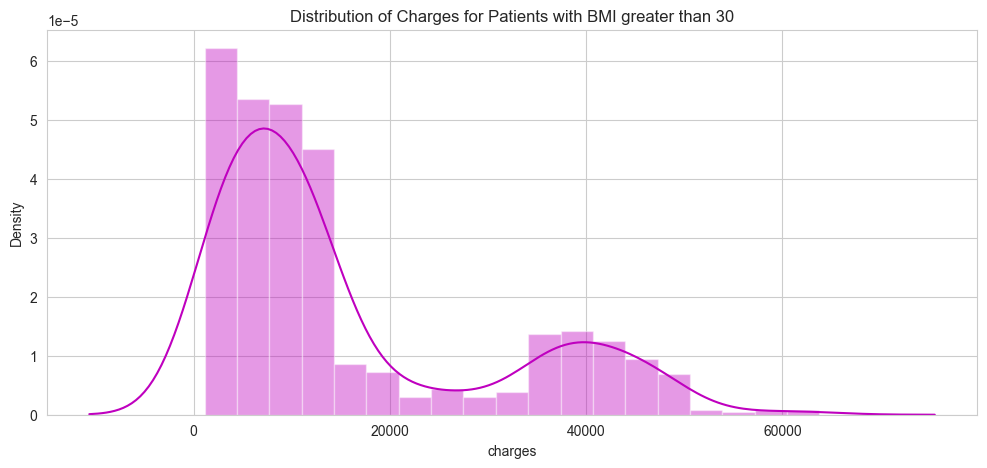

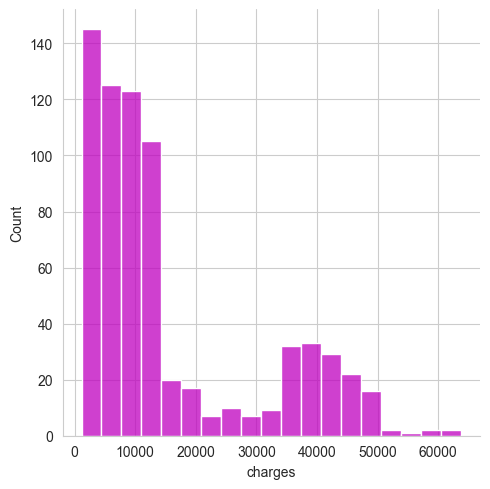

In [107]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Charges for Patients with BMI greater than 30')
ax = sns.distplot(df_mod1_bmi_index[(df_mod1_bmi_index.bmi >= 30)]['charges'], color='m')
ax = sns.displot(df_mod1_bmi_index[(df_mod1_bmi_index.bmi >= 30)]['charges'], color='m')

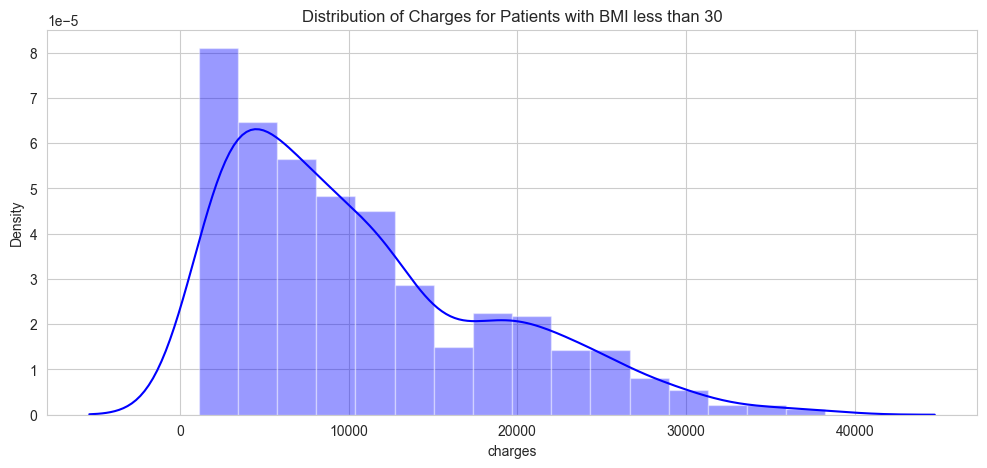

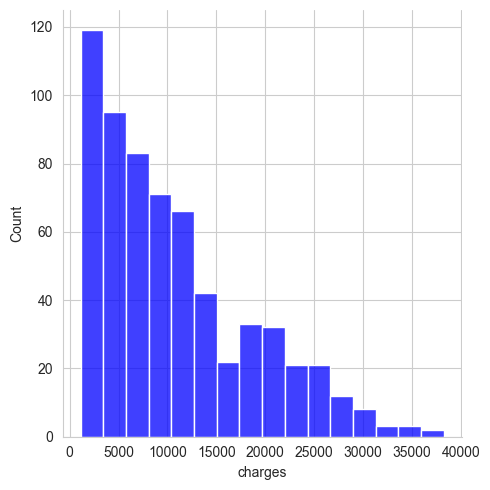

In [108]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Charges for Patients with BMI less than 30')
ax = sns.distplot(df_mod1_bmi_index[(df_mod1_bmi_index.bmi <= 30)]['charges'], color='b')
ax = sns.displot(df_mod1_bmi_index[(df_mod1_bmi_index.bmi <= 30)]['charges'], color='b')

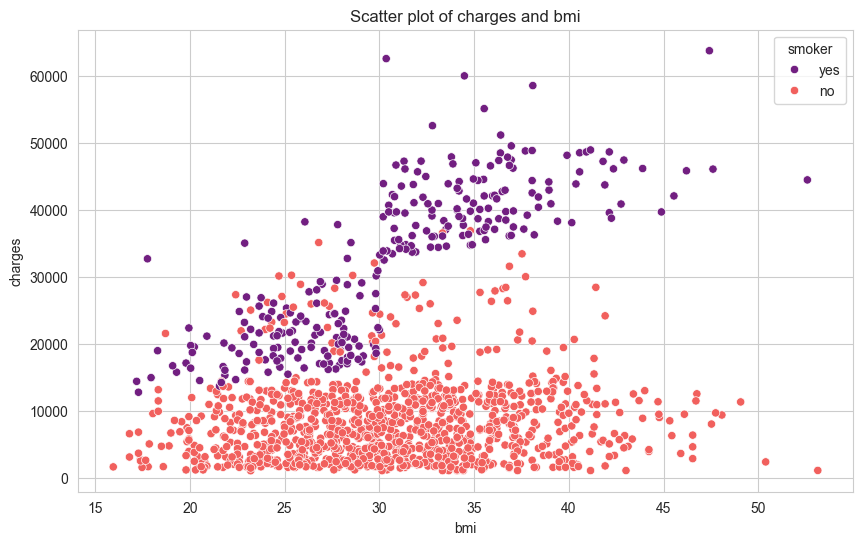

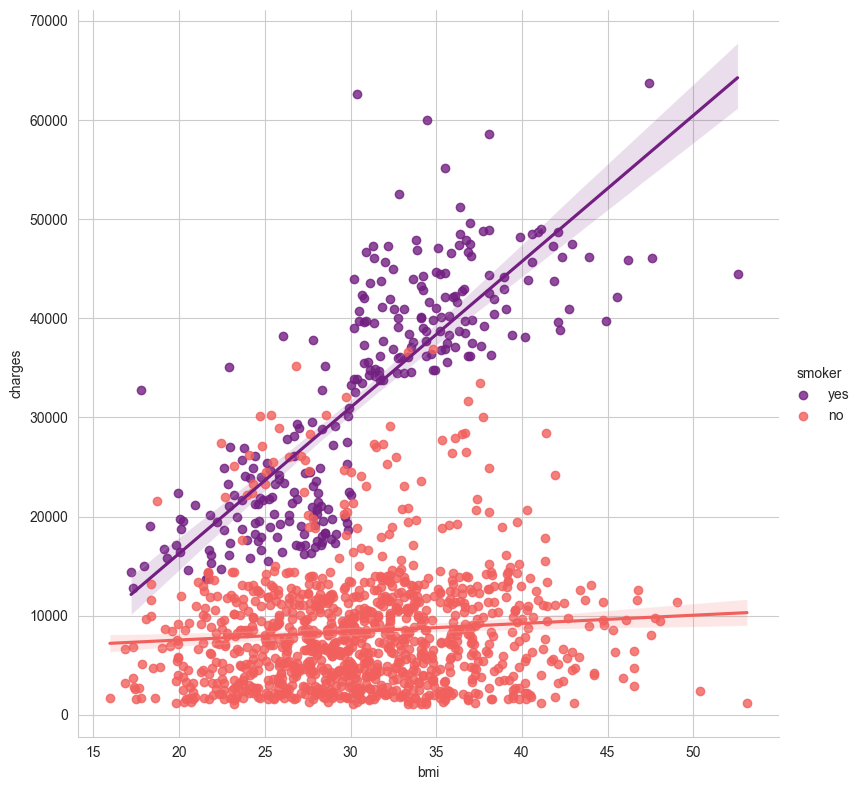

In [109]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df_mod1_bmi_index,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df_mod1_bmi_index, palette = 'magma', height = 8)

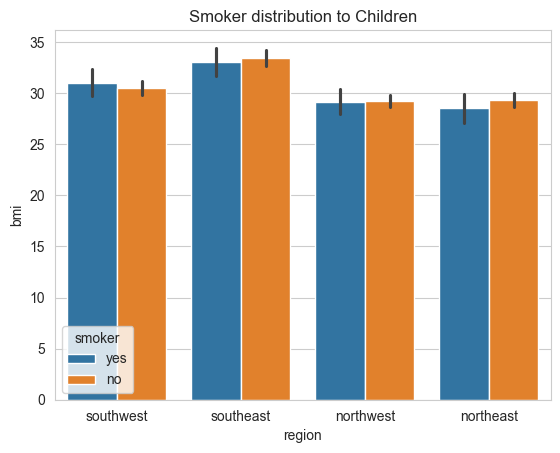

In [110]:
sns.barplot(x='region', y = 'bmi', hue='smoker', data=df_mod1_bmi_index)
plt.title('Smoker distribution to Children')
plt.show()

In [111]:
categoric_col = df_mod1_bmi_index.select_dtypes(include="object")
categoric_col.columns

Index(['sex', 'smoker', 'region', 'bmi_index'], dtype='object')

In [112]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
import sklearn.metrics as mt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


In [114]:
df = df_mod1_bmi_index.copy()

In [119]:
#SEX
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
#SMOKER
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
#REGION
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)
#bmi_index
le.fit(df.bmi_index.drop_duplicates())
df.bmi_index = le.transform(df.bmi_index)
df

,age,sex,bmi,children,smoker,region,charges,bmi_index
0,19,0,27.900,0,1,3,16884.92400,3
1,18,1,33.770,1,0,2,1725.55230,2
2,28,1,33.000,3,0,2,4449.46200,2
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,3
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,2
1334,18,0,31.920,0,0,0,2205.98080,2
1335,18,0,36.850,0,0,2,1629.83350,4
1336,21,0,25.800,0,0,3,2007.94500,3


In [121]:
print(f"sex = {df['sex'].unique().tolist()}")
print(f"smoker = {df['smoker'].unique().tolist()}")
print(f"region = {df['region'].unique().tolist()}")
print(f"bmi_index = {df['bmi_index'].unique().tolist()}")

sex = [0, 1]
smoker = [1, 0]
region = [3, 2, 1, 0]
bmi_index = [3, 2, 1, 4, 0, 5]


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int32  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int32  
 5   region     1338 non-null   int32  
 6   charges    1338 non-null   float64
 7   bmi_index  1338 non-null   object 
dtypes: float64(2), int32(3), int64(2), object(1)
memory usage: 68.1+ KB


In [122]:
df.corr()['charges'].sort_values()

region      -0.006208
bmi_index    0.028476
sex          0.057292
children     0.067998
bmi          0.198341
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

<Axes: >

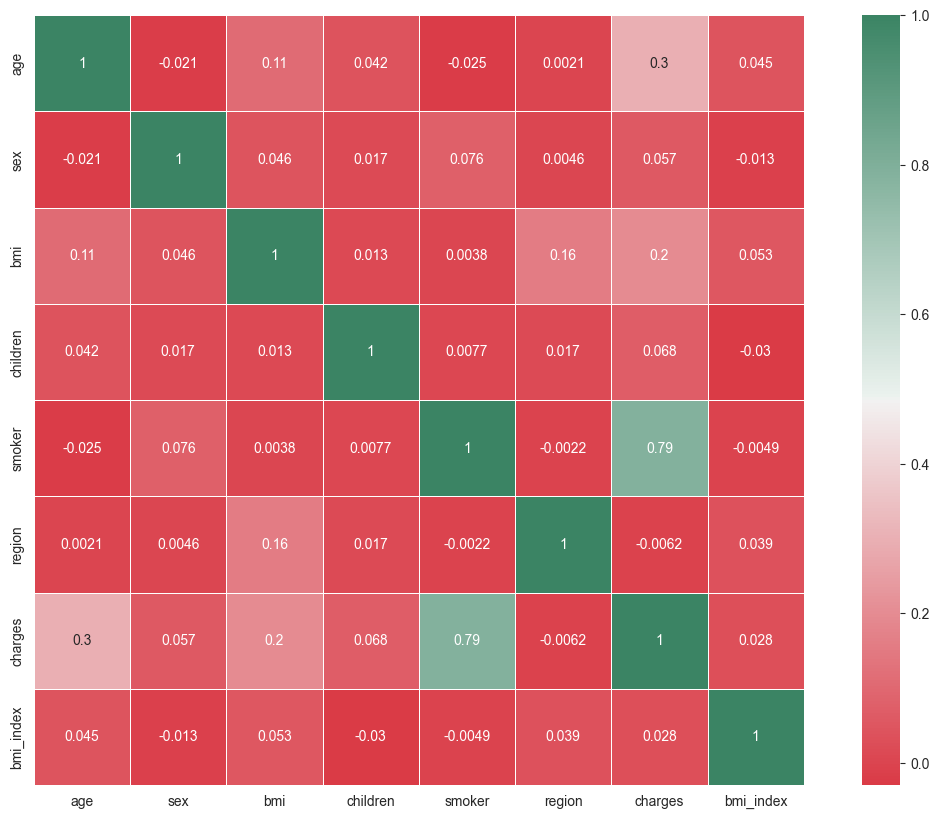

In [123]:
f, ax = plt.subplots(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(10, 150, as_cmap=True),annot=True,linewidth=.5, square=True, ax=ax)

In [124]:
numerical_columns = ['age','bmi']
categorical_columns = ['sex','children','smoker', 'region', 'bmi_index']

In [125]:
X = df.drop("charges", axis=1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [127]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop = "if_binary"), categorical_columns)
    ])


X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

In [128]:
X_train

<1070x20 sparse matrix of type '<class 'numpy.float64'>'
	with 6118 stored elements in Compressed Sparse Row format>

In [129]:
print(f"X_train size is: {X_train.shape}")
print(f"X_test size is: {X_test.shape}")
print(f"y_train size is: {y_train.shape}")
print(f"y_test size is: {y_test.shape}")

X_train size is: (1070, 20)
X_test size is: (268, 20)
y_train size is: (1070,)
y_test size is: (268,)


In [130]:
X_train

<1070x20 sparse matrix of type '<class 'numpy.float64'>'
	with 6118 stored elements in Compressed Sparse Row format>

In [131]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_index
0,19,0,27.900,0,1,3,16884.92400,3
1,18,1,33.770,1,0,2,1725.55230,2
2,28,1,33.000,3,0,2,4449.46200,2
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,3
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,2
1334,18,0,31.920,0,0,0,2205.98080,2
1335,18,0,36.850,0,0,2,1629.83350,4
1336,21,0,25.800,0,0,3,2007.94500,3


In [132]:
# Custom function for cross-validation
def cross_validation_score(model, X, y):
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores.mean()

In [133]:
# Custom function for model performance
def evaluate_performance(actual, predicted):
    rmse = np.sqrt(metrics.mean_squared_error(actual, predicted))
    r2 = metrics.r2_score(actual, predicted)
    return rmse, r2

In [134]:
# Initialize models
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_net = ElasticNet()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
random_forest = RandomForestRegressor(random_state=42)

In [135]:
# Fit models
linear_model = linear_reg.fit(X_train, y_train)
ridge_model = ridge_reg.fit(X_train, y_train)
lasso_model = lasso_reg.fit(X_train, y_train)
elas_model = elastic_net.fit(X_train, y_train)
tree_model = decision_tree.fit(X_train, y_train)
forest_model = random_forest.fit(X_train, y_train)

In [136]:
# Make predictions
linear_predictions = linear_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
elas_predictions = elas_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)
forest_predictions = forest_model.predict(X_test)

In [137]:
# Evaluate model performance and cross-validation
model_results = []


In [138]:
from sklearn import metrics
models = [linear_reg, ridge_reg, lasso_reg, elastic_net, decision_tree, random_forest]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'Decision Tree', 'Random Forest']

for model, model_name, preds in zip(models, model_names, [linear_predictions, ridge_predictions, lasso_predictions, elas_predictions, tree_predictions, forest_predictions]):
    rmse, r2 = evaluate_performance(y_test, preds)
    cv_rmse = cross_validation_score(model, X_train, y_train)
    model_results.append([model_name, rmse, r2, cv_rmse])

In [139]:
# Create a DataFrame to store the results
columns = ['Model', 'RMSE', 'R2', 'Cross-Validation RMSE']
results_df = pd.DataFrame(data=model_results, columns=columns)

In [140]:
# Display the results
print(results_df)

                   Model         RMSE        R2  Cross-Validation RMSE
0      Linear Regression  5883.413209  0.777038            6077.068864
1       Ridge Regression  5871.323101  0.777954            6076.479496
2       Lasso Regression  5878.912133  0.777379            6076.540690
3  ElasticNet Regression  9694.678186  0.394605            9511.607950
4          Decision Tree  4673.370349  0.859320            4783.800627
5          Random Forest  4674.854316  0.859231            4952.844876


In [141]:
# Evaluate models using LazyRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

models

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [144]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Define hyperparameter combinations to set
model = GradientBoostingRegressor(random_state=42)

# Find the best combination of hyperparameters using Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Choose the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Mean Absolute Error (MAE): 2743.20651718799
Mean Squared Error (MSE): 19367484.60534177
R-squared (R^2): 0.8752486772726511


In [145]:
# from sklearn.ensemble import GradientBoostingRegressor
best_params = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}

# Define the best parameters
model_gradient = GradientBoostingRegressor(**best_params, random_state=42)

# Apply the data to the model and retrain the model
model_gradient.fit(X_train, y_train)

# Evaluate the results
y_pred = model_gradient.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 2743.20651718799
Mean Squared Error (MSE): 19367484.60534177
R-squared (R^2): 0.8752486772726511
